# Step 0: Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings


Populating the interactive namespace from numpy and matplotlib


# Step 1: Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rawanmansourr/SportsInjuries/main/Sesstion.csv')

In [3]:
df.shape

(42766, 13)

In [4]:
df.head()
#df.columns

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,Athlete ID,injury,Date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


# Step 2: Cleaning Data

#####          A. Columns
1. Relace column it have the "." with "_" 
2. Relace column it have the " " with "_" 
3. Relace column it have the "-" with "_" 
4. Lower Case

In [5]:
df.columns = df.columns.str.replace( '.', '' ).str.replace( '/', '_' ).str.replace( '-', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()

In [6]:
df.head()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


#### B. Row (Cells)
1. There is No Null value in first view
2. When I check the type of data is compatible with columns
3. T

### I Dont use str.replace to my dataset becuse all Data is not Object only Intger and Float

In [7]:
df.isna().sum()

nr_sessions                  0
total_km                     0
km_z3_4                      0
km_z5_t1_t2                  0
km_sprinting                 0
strength_training            0
hours_alternative            0
perceived_exertion           0
perceived_trainingsuccess    0
perceived_recovery           0
athlete_id                   0
injury                       0
date                         0
dtype: int64

In [8]:
df.dtypes

nr_sessions                    int64
total_km                     float64
km_z3_4                      float64
km_z5_t1_t2                  float64
km_sprinting                 float64
strength_training              int64
hours_alternative            float64
perceived_exertion           float64
perceived_trainingsuccess    float64
perceived_recovery           float64
athlete_id                     int64
injury                         int64
date                           int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nr_sessions                42766 non-null  int64  
 1   total_km                   42766 non-null  float64
 2   km_z3_4                    42766 non-null  float64
 3   km_z5_t1_t2                42766 non-null  float64
 4   km_sprinting               42766 non-null  float64
 5   strength_training          42766 non-null  int64  
 6   hours_alternative          42766 non-null  float64
 7   perceived_exertion         42766 non-null  float64
 8   perceived_trainingsuccess  42766 non-null  float64
 9   perceived_recovery         42766 non-null  float64
 10  athlete_id                 42766 non-null  int64  
 11  injury                     42766 non-null  int64  
 12  date                       42766 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 4.2 MB


In [10]:
df.duplicated().sum()

0

# Setp 3: EDA


### The Target will be <font color='blue'>injury</font>

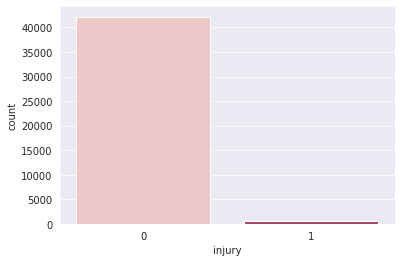

In [11]:
sns.set_style('darkgrid')
sns.countplot( x = 'injury', data = df, palette=["#f4c2c3", "#B43B62"]);

This plot shows there is unbalance between in the dataset

In [12]:
df.describe()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [13]:
df.injury.describe()

count    42766.000000
mean         0.013632
std          0.115960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: injury, dtype: float64

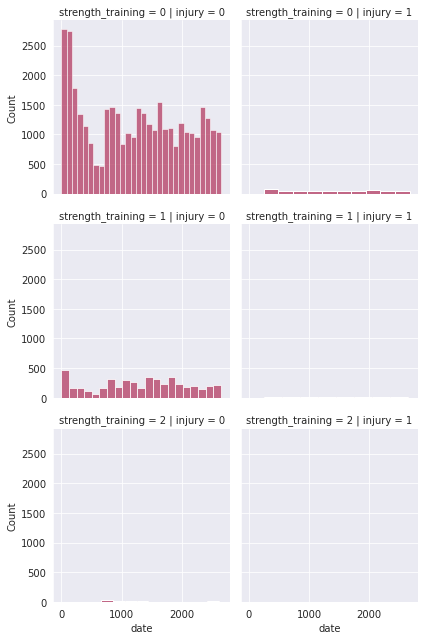

In [14]:
d = {'color': ['#B43B62','#f4c2c3']}
g = sns.FacetGrid(df, col='injury', row='strength_training' , hue_kws=d)
g.map_dataframe(sns.histplot, x= 'date');

In [15]:
#df.duplicated().sum()
#df[col].nunique()
df['injury'].unique()
#df['strength_training'].unique()

array([0, 1])

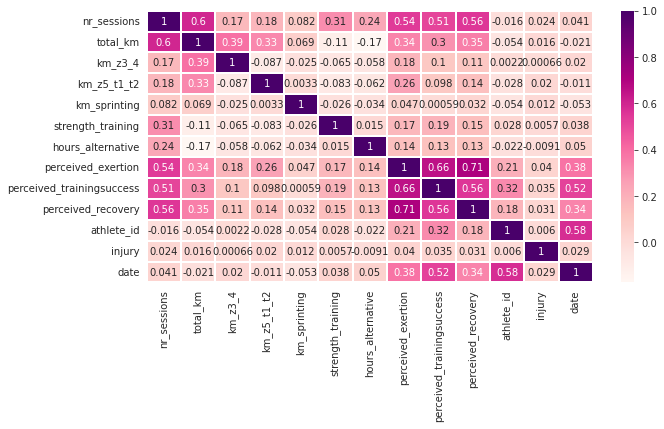

In [16]:
plt.figure(figsize=[10,5])
correct = df.corr()
sns.heatmap(correct, annot=True, linewidths=1, cmap="RdPu");

# Step 4: Model (Before applying SMOTE)

1.LogisticRegression

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



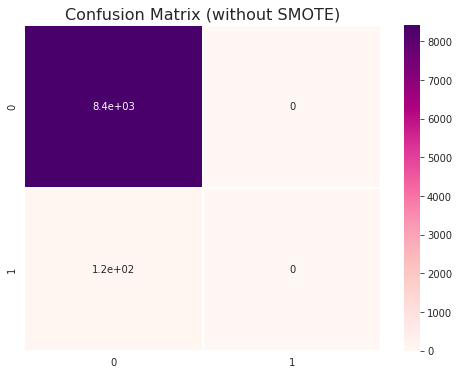

In [17]:

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
x = df.drop(columns=['injury']) 
y = df.injury

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) 

lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train) 
y_pred = lr_model.predict(x_test) 

print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

2.Xgboost

Accuracy Score: 0.986088379705401
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



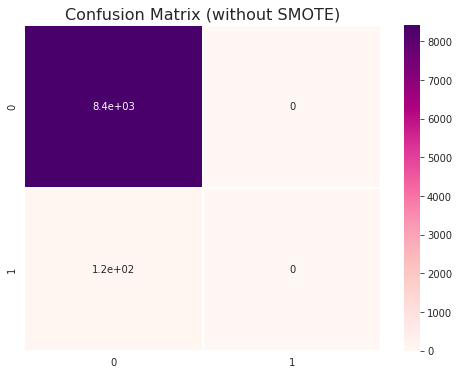

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_train, y_train)
y_pred= model5.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

3.KNN

Accuracy Score: 0.985854570960954
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.33      0.02      0.03       119

    accuracy                           0.99      8554
   macro avg       0.66      0.51      0.51      8554
weighted avg       0.98      0.99      0.98      8554



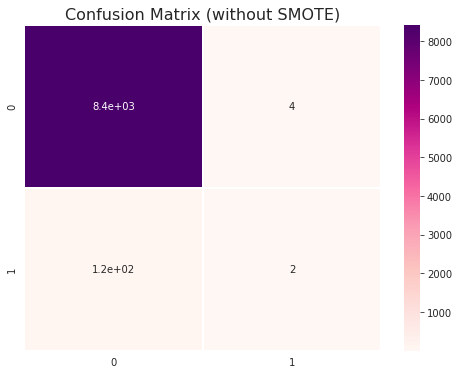

In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

Accuracy Score: 0.986088379705401
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



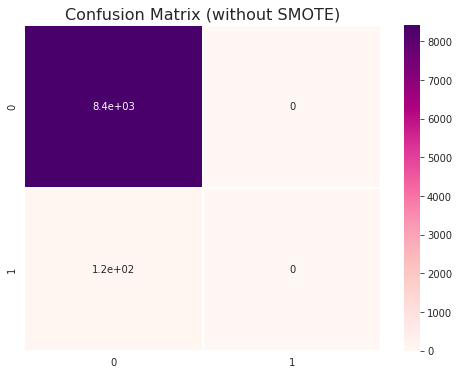

In [20]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");


Apply SMOTE to features (X) and the target (y) and store the results in dedicated variables. The new feature and target set is larger, due to oversampling. Here’s the code for applying SMOTE:

In [28]:
sm = SMOTE(random_state=42)
x_sm, y_sm =sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100



Shape of X before SMOTE: (42766, 12)
Shape of x after SMOTE: (67496, 12)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: injury, dtype: float64

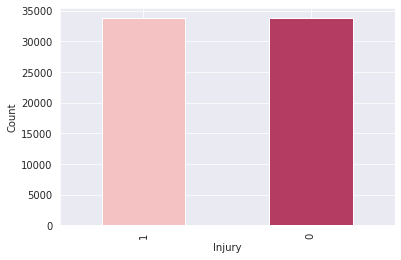

In [29]:
X = x_sm
y = y_sm
plt.xlabel('Injury')
plt.ylabel('Count')
pd.value_counts(y).plot.bar(color=["#f4c2c3", "#B43B62"])


After balancing data.

# Model (After applying SMOTE):

1.LogisticRegression

Accuracy Score: 0.6216220220457509
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     33748
           1       0.62      0.63      0.62     33748

    accuracy                           0.62     67496
   macro avg       0.62      0.62      0.62     67496
weighted avg       0.62      0.62      0.62     67496



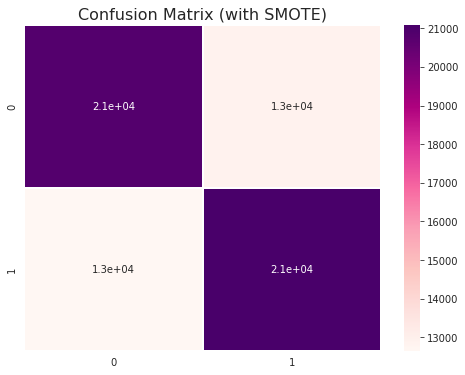

In [23]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
x=df.drop(columns=['injury']) 
y= df.injury

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) 
lr_model = LogisticRegression() 
lr_model.fit(x_sm, y_sm) 
y_pred = lr_model.predict(x_sm) 

print("Accuracy Score:",accuracy_score(y_sm,y_pred))

print(classification_report(y_sm, y_pred)) 
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True,linewidths=1, cmap="RdPu");

2.Xgboost

Accuracy Score: 0.8631474457745644
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     33748
           1       0.86      0.87      0.86     33748

    accuracy                           0.86     67496
   macro avg       0.86      0.86      0.86     67496
weighted avg       0.86      0.86      0.86     67496



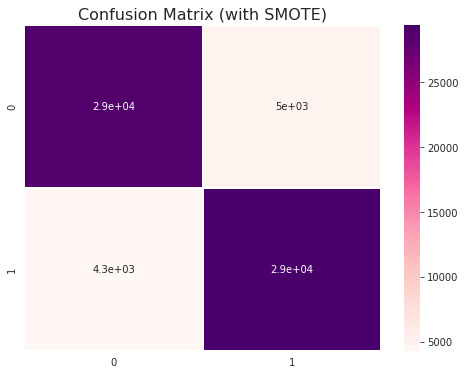

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_sm, y_sm)
y_pred= model5.predict(x_sm)


print("Accuracy Score:",accuracy_score(y_sm,y_pred))
print(classification_report(y_sm,y_pred))
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

3.KNN

Accuracy Score: 0.9766060210975466
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     33748
           1       0.96      1.00      0.98     33748

    accuracy                           0.98     67496
   macro avg       0.98      0.98      0.98     67496
weighted avg       0.98      0.98      0.98     67496



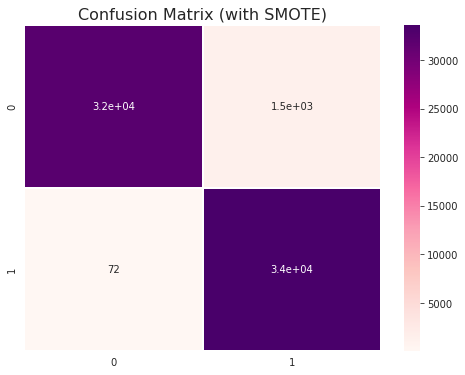

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_sm, y_sm)
y_pred = model.predict(x_sm)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_sm,y_pred))
print(classification_report(y_sm,y_pred))
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True,  linewidths=1, cmap="RdPu");

In [27]:
results = pd.DataFrame({
    'Model': ['KNN','Logistic Regression','Xgboost'],
    'Score': [0.976,0.863, 0.621]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.976                  KNN
0.863  Logistic Regression
0.621              Xgboost


# 5.Conclusion

From the results we can observe that the Xgboost performs better than the other algorithms. At the Xgboost managed to achieve a classification accuracy of 98%.